In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cut_tree
from ISLP import load_data
from ISLP.cluster import compute_linkage

c:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
USArrests = get_rdataset('USArrests').data
USArrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
USArrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [8]:
scaler = StandardScaler().fit(USArrests)
US_scaled = scaler.transform(USArrests)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [10]:
pcaUS = PCA()
pcaUS.fit(US_scaled)

PCA()

In [11]:
pcaUS.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

In [13]:
scores = pcaUS.transform(US_scaled)
scores

array([[ 9.85565885e-01,  1.13339238e+00, -4.44268788e-01,
         1.56267145e-01],
       [ 1.95013775e+00,  1.07321326e+00,  2.04000333e+00,
        -4.38583440e-01],
       [ 1.76316354e+00, -7.45956781e-01,  5.47808243e-02,
        -8.34652924e-01],
       [-1.41420290e-01,  1.11979678e+00,  1.14573692e-01,
        -1.82810896e-01],
       [ 2.52398013e+00, -1.54293399e+00,  5.98556799e-01,
        -3.41996478e-01],
       [ 1.51456286e+00, -9.87555085e-01,  1.09500699e+00,
         1.46488703e-03],
       [-1.35864746e+00, -1.08892789e+00, -6.43257569e-01,
        -1.18469414e-01],
       [ 4.77093091e-02, -3.25358925e-01, -7.18632942e-01,
        -8.81977637e-01],
       [ 3.01304227e+00,  3.92285133e-02, -5.76829492e-01,
        -9.62847520e-02],
       [ 1.63928304e+00,  1.27894240e+00, -3.42460080e-01,
         1.07679681e+00],
       [-9.12657146e-01, -1.57046001e+00,  5.07818939e-02,
         9.02806864e-01],
       [-1.63979985e+00,  2.10972917e-01,  2.59801342e-01,
      

In [14]:
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [15]:
scores.std(0, ddof=1)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [16]:
pcaUS.explained_variance_, pcaUS.explained_variance_ratio_

(array([2.53085875, 1.00996444, 0.36383998, 0.17696948]),
 array([0.62006039, 0.24744129, 0.0891408 , 0.04335752]))

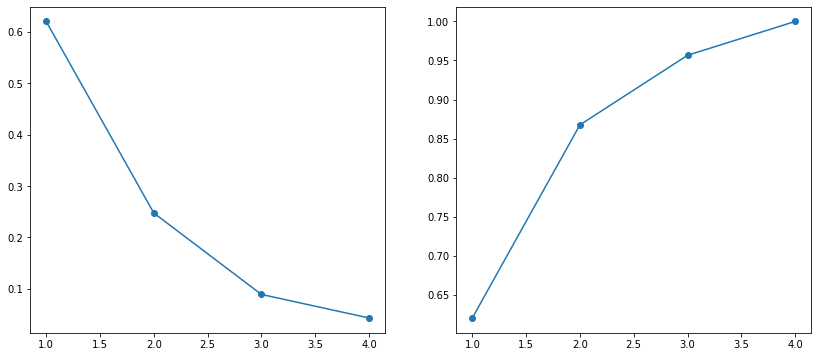

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
ticks = np.arange(pcaUS.n_components_) + 1
ax = axs[0]
ax.plot(ticks, pcaUS.explained_variance_ratio_, marker='o')
ax2 = axs[1]
ax2.plot(ticks, pcaUS.explained_variance_ratio_.cumsum(), marker='o')

In [20]:
X = US_scaled
U, D, V = np.linalg.svd(X, full_matrices=False)
U.shape, D.shape, V.shape

((50, 4), (4,), (4, 4))

In [21]:
V, pcaUS.components_

(array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
        [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
        [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
        [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]]),
 array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
        [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
        [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
        [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]]))

In [22]:
(U * D[None, :])[:4], scores[:4]

(array([[-0.98556588,  1.13339238, -0.44426879,  0.15626714],
        [-1.95013775,  1.07321326,  2.04000333, -0.43858344],
        [-1.76316354, -0.74595678,  0.05478082, -0.83465292],
        [ 0.14142029,  1.11979678,  0.11457369, -0.1828109 ]]),
 array([[ 0.98556588,  1.13339238, -0.44426879,  0.15626714],
        [ 1.95013775,  1.07321326,  2.04000333, -0.43858344],
        [ 1.76316354, -0.74595678,  0.05478082, -0.83465292],
        [-0.14142029,  1.11979678,  0.11457369, -0.1828109 ]]))

In [23]:
n_omit = 20
np.random.seed(15)
r_idx = np.random.choice(np.arange(X.shape[0]), n_omit, replace=False)
c_idx = np.random.choice(np.arange(X.shape[1]), n_omit, replace=True)
Xna = X.copy()
Xna[r_idx, c_idx] = np.nan

In [28]:
def low_rank(X, M=1):
    U, D, V = np.linalg.svd(X)
    L = U[:, :M] * D[None, :M]
    return L.dot(V[:M])

In [25]:
Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis=0)
Xhat[r_idx, c_idx] = Xbar[c_idx]

In [26]:
thr = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna)
mssold = np.mean(Xhat[~ismiss]**2)
mss0 = np.mean(Xna[~ismiss]**2)

In [29]:
while rel_err > thr:
    count += 1
    Xapp = low_rank(Xhat, M=1)
    Xhat[ismiss] = Xapp[ismiss]
    mss = np.mean(((Xna - Xapp)[~ismiss])**2)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print(f'Iteration: {count}, MSS:{mss:.3f}, Rel.Err {rel_err:.2e}')

Iteration: 2, MSS:0.395, Rel.Err 5.99e-01
Iteration: 3, MSS:0.382, Rel.Err 1.33e-02
Iteration: 4, MSS:0.381, Rel.Err 1.44e-03
Iteration: 5, MSS:0.381, Rel.Err 1.79e-04
Iteration: 6, MSS:0.381, Rel.Err 2.58e-05
Iteration: 7, MSS:0.381, Rel.Err 4.22e-06
Iteration: 8, MSS:0.381, Rel.Err 7.65e-07
Iteration: 9, MSS:0.381, Rel.Err 1.48e-07
Iteration: 10, MSS:0.381, Rel.Err 2.95e-08


In [30]:
np.corrcoef(Xapp[ismiss], X[ismiss])

array([[1.        , 0.71135674],
       [0.71135674, 1.        ]])

In [31]:
np.random.seed(0)
X = np.random.standard_normal((50, 2))
X[:25, 0] += 3
X[:25, 1] -= 4

In [32]:
kmeans = KMeans(n_clusters=2, random_state=2, n_init=20).fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])